# Airbnb Hotel Booking Analysis  

### Internship: AICTE Edunet Foundation — Data Analysis using LLMs  

**Name:** Raghavendra Rao Kulkarni

**Apply ID:** APPLY_175647250568b1a4b99b32a

**Internship ID:**   INTERNSHIP_17546440516895be537820f  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/Netflix Dataset 1.csv')

In [12]:
pd.set_option('display.max_columns',None)
sns.set(style="whitegrid")


In [13]:
print(df.shape)

(7789, 11)


In [14]:
print(df.columns)

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [16]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [17]:
# 3. Dataset Overview
# ==============================
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate records:", df.duplicated().sum())

Shape of dataset: (7789, 11)

Data types:
 Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

Missing values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Duplicate records: 2


In [19]:
# 4. Data Cleaning
# ==============================
# Drop duplicates
df = df.drop_duplicates()


# Fill missing values where possible
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')


# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [20]:
#3. Normalize Category/Type columns
# You have 'Category' and 'Type' columns. We'll use 'Category' (Movie vs TV Show) and keep 'Type' as genres.
df['Category'] = df['Category'].str.strip()  # standardize

# I. Univariate Analysis  
*Goal: Understand each variable separately to explore the dataset’s overall structure.*

---

### **Q1. What is the overall composition of Netflix content — Movies or TV Shows?**
**Why:** To understand which content type dominates Netflix’s catalog.  

**Visualization:** Pie Chart — proportion of Movies vs TV Shows.

<Axes: title={'center': 'Movies vs TV Shows'}, ylabel='count'>

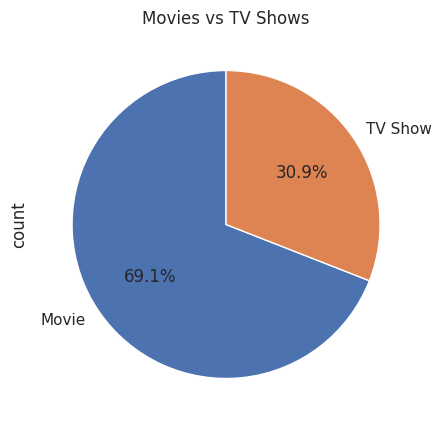

In [22]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                   title='Movies vs TV Shows', figsize=(5,5))

#Insight:
Majority of the titles are Movies, with a smaller but growing share of TV Shows.

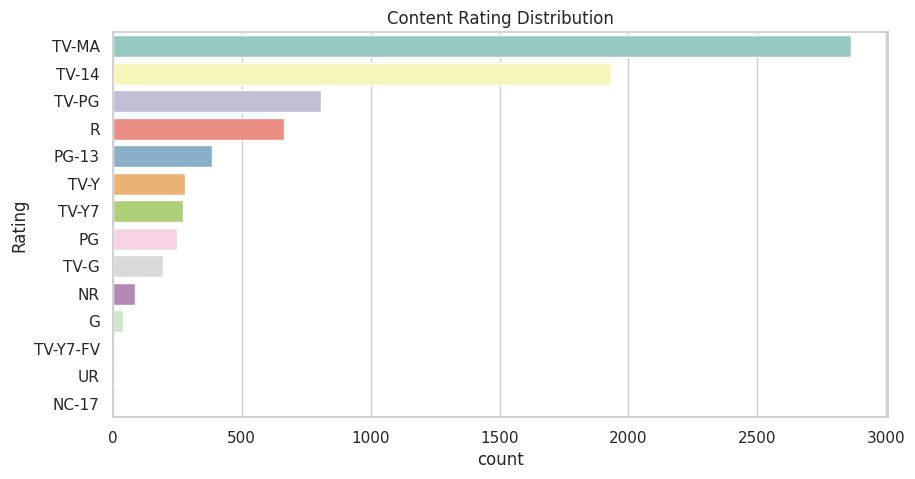

In [24]:
# Ratings distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='Set3')
plt.title("Content Rating Distribution")
plt.show()

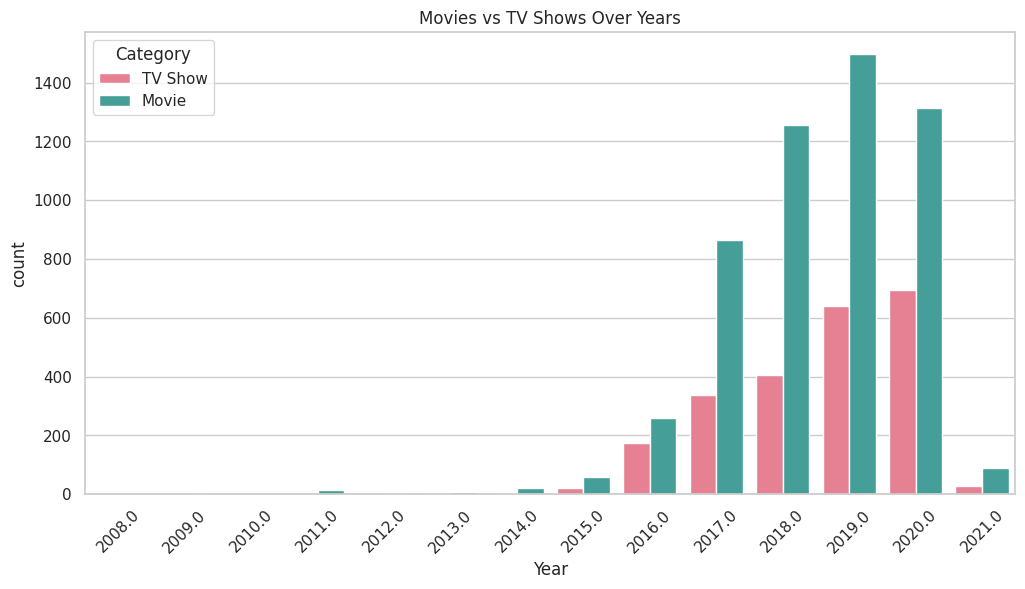

In [25]:
# 6. Content Trends Over Time
# ==============================
# Movies vs TV Shows by year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Category', palette='husl')
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Over Years")
plt.show()

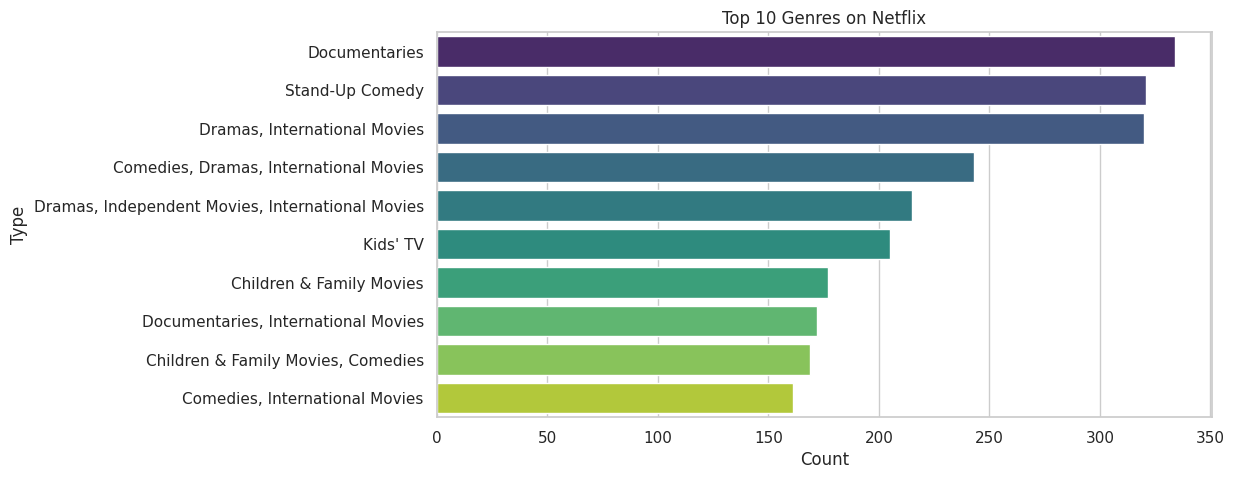

In [26]:
# 7. Genre / Type Analysis
# ==============================
# Top genres
top_genres = df['Type'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.show()

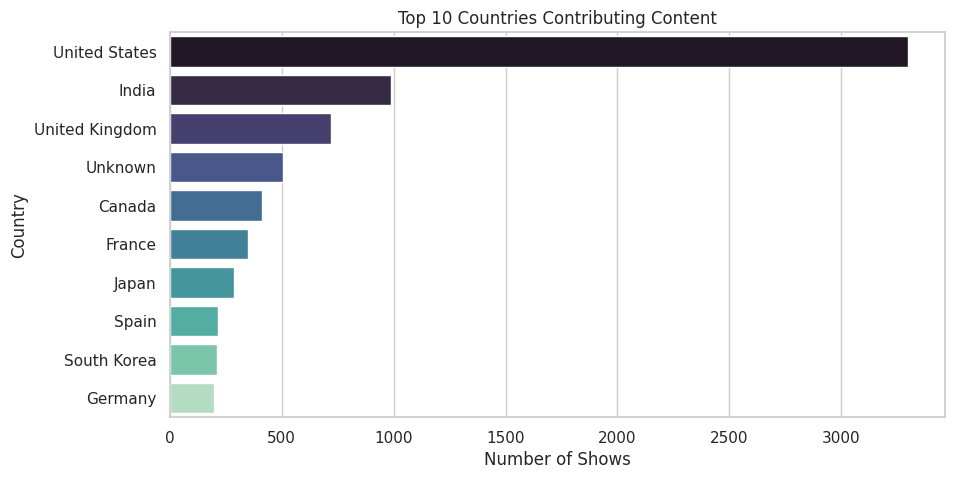

In [27]:
# 8. Country-wise Contributions
# ==============================
# Split multiple countries
df_countries = df.assign(Country=df['Country'].str.split(", ")).explode('Country')


country_counts = df_countries['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Shows")
plt.show()

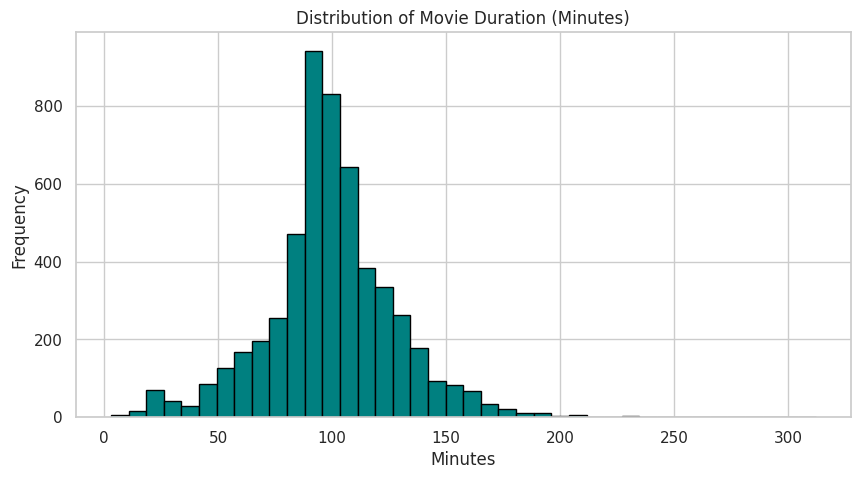

In [28]:
# 9. Duration Analysis
# ==============================
# Movies duration distribution
movies = df[df['Category']=="Movie"]
movies['Minutes'] = movies['Duration'].str.replace(' min','').astype(str).str.extract('(\d+)')
movies['Minutes'] = pd.to_numeric(movies['Minutes'], errors='coerce')


plt.figure(figsize=(10,5))
plt.hist(movies['Minutes'].dropna(), bins=40, color='teal', edgecolor='black')
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

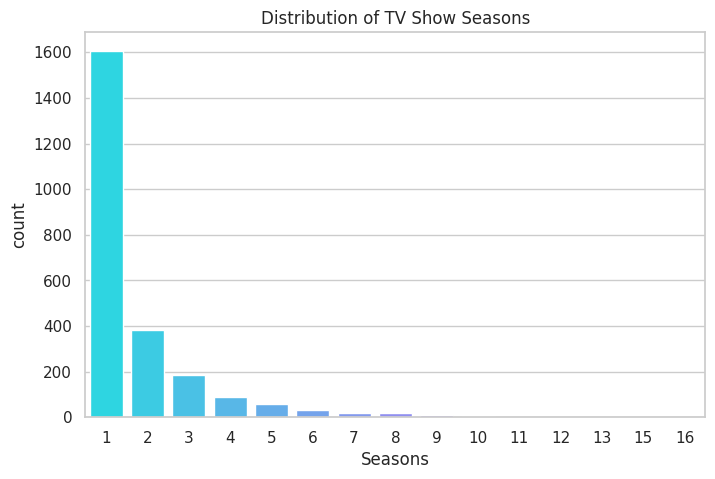

In [29]:
# TV Show seasons distribution
tvshows = df[df['Category']=="TV Show"]
tvshows['Seasons'] = tvshows['Duration'].str.replace(' Season[s]?', '', regex=True)
tvshows['Seasons'] = pd.to_numeric(tvshows['Seasons'], errors='coerce')


plt.figure(figsize=(8,5))
sns.countplot(x='Seasons', data=tvshows, palette='cool')
plt.title("Distribution of TV Show Seasons")
plt.show()

II. Bivariate Analysis

Goal: Study relationships between two variables to identify patterns.

Q1. How do Movies and TV Shows differ across years?

Why: To compare the growth patterns of both content types over time.

Visualization: Line Chart — Movies vs TV Shows count per year.

<Axes: title={'center': 'Movies vs TV Shows Over Years'}, xlabel='Year'>

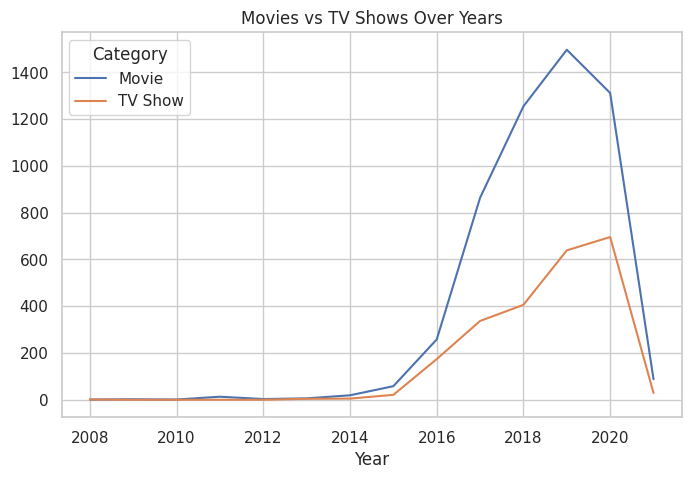

In [30]:
mv_tv = df.groupby(['Year','Category']).size().unstack(fill_value=0)
mv_tv.plot(kind='line', figsize=(8,5), title='Movies vs TV Shows Over Years')


Q2. Which countries contribute most to Movies vs TV Shows?

Why: To identify Netflix’s key content-producing regions and geographical focus.

Visualization: Grouped Bar Chart — Top countries by count, split by Category.

<Axes: title={'center': 'Movies vs TV Shows by Country'}, xlabel='Country'>

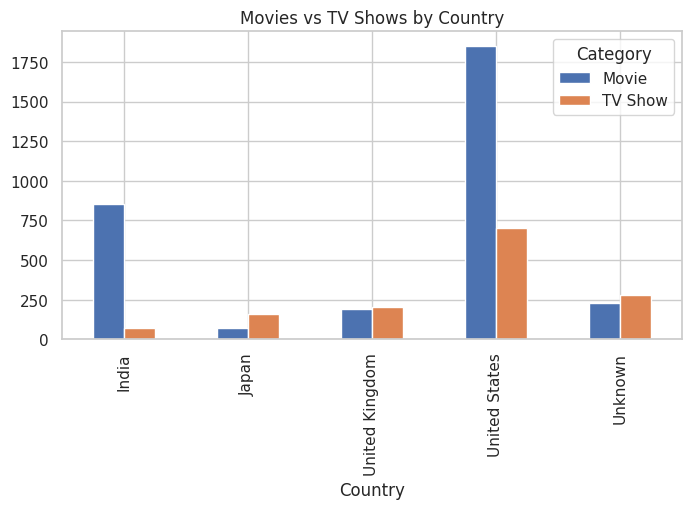

In [31]:
top_countries = df['Country'].value_counts().head(5).index
country_split = df[df['Country'].isin(top_countries)].groupby(['Country','Category']).size().unstack(fill_value=0)
country_split.plot(kind='bar', figsize=(8,4), title='Movies vs TV Shows by Country')


Q3. How does content rating vary by category (Movie or TV Show)?

Why: To understand target audience differences across categories.

Visualization: Stacked Bar Chart — Rating distribution by Category.

<Axes: title={'center': 'Rating Distribution by Category'}, xlabel='Rating'>

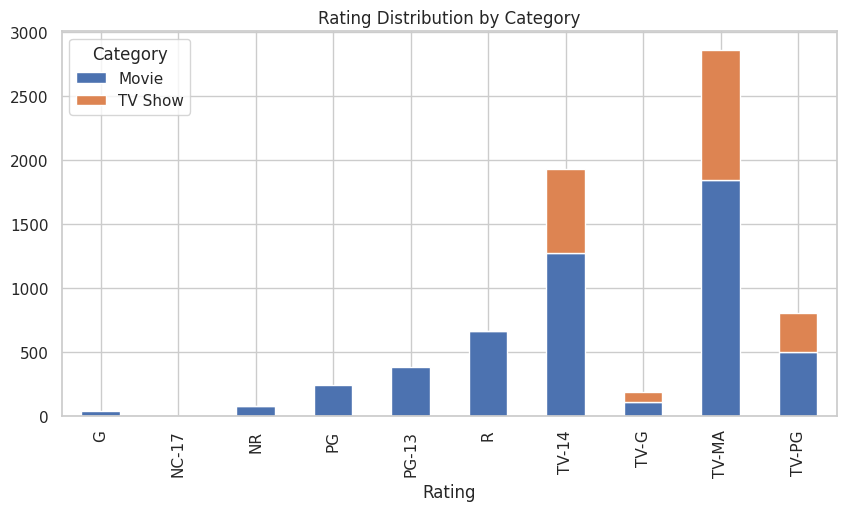

In [32]:
rating_split = df.groupby(['Rating','Category']).size().unstack(fill_value=0).head(10)
rating_split.plot(kind='bar', stacked=True, figsize=(10,5), title='Rating Distribution by Category')


III. Multivariate Analysis

Goal: Examine combined relationships among three or more variables for deeper insight.

Q1. How do genres, years, and content type (Movie/TV) interact?

Why: To identify which genres are growing fastest in each content type over time.

Visualization: Line Chart — Top genres trend by category.

In [37]:
if 'df_exploded' not in locals():
    df['Type'] = df['Type'].fillna('')
    df['genres_list'] = df['Type'].str.split(',').apply(lambda x: [i.strip() for i in x if i.strip() != ''])
    df_exploded = df.explode('genres_list').rename(columns={'genres_list': 'Genre'})


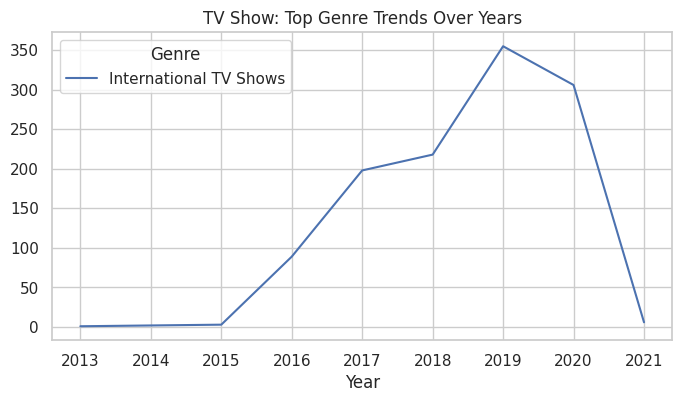

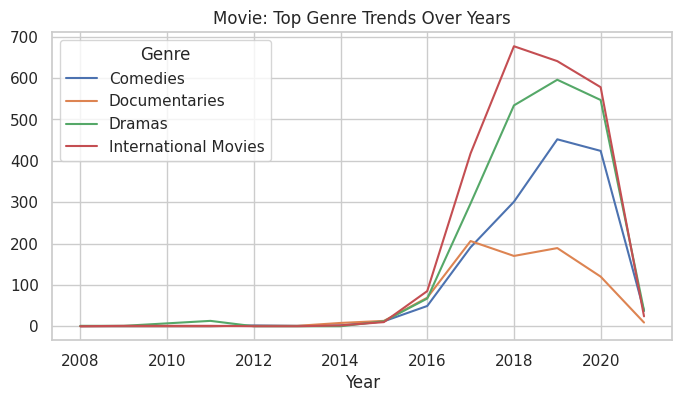

In [38]:
genre_year = df_exploded.groupby(['Year','Category','Genre']).size().reset_index(name='Count')
top_genres = df_exploded['Genre'].value_counts().head(5).index
genre_year_top = genre_year[genre_year['Genre'].isin(top_genres)]
for cat in df['Category'].unique():
    subset = genre_year_top[genre_year_top['Category']==cat].pivot(index='Year', columns='Genre', values='Count').fillna(0)
    subset.plot(figsize=(8,4), title=f'{cat}: Top Genre Trends Over Years')


Text(0.5, 1.0, 'Top Countries vs Genres (Movies)')

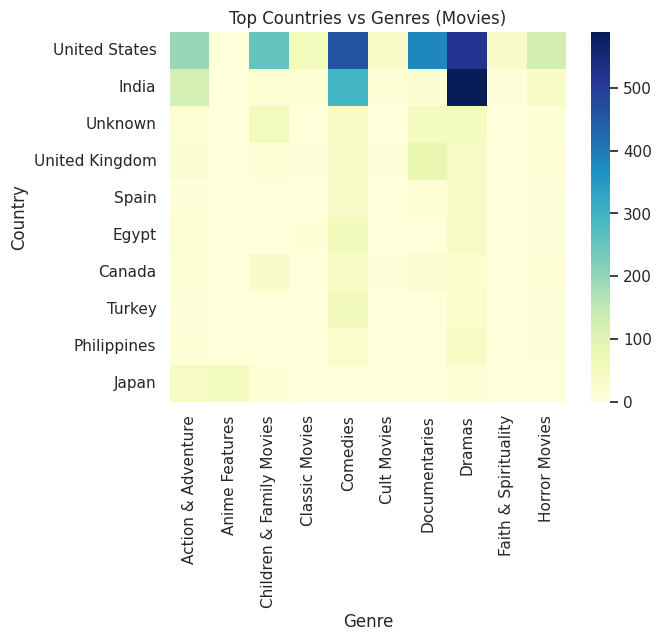

In [40]:
pivot = df_exploded[df_exploded['Category']=='Movie'].pivot_table(index='Country', columns='Genre',
                                                                 values='Show_Id', aggfunc='count').fillna(0)
top_countries = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
sns.heatmap(pivot.loc[top_countries].iloc[:, :10], cmap='YlGnBu')
plt.title('Top Countries vs Genres (Movies)')


# Conclusion

The Netflix Dataset Analysis aimed to uncover patterns and insights from the platform’s catalog spanning over a decade.  
By performing univariate, bivariate, and multivariate analysis, several key observations emerged that reflect Netflix’s strategic content evolution.

---

## Key Findings

1. **Content Composition**
   - Movies dominate the catalog, accounting for the majority of titles.
   - TV Shows, though fewer, have grown rapidly since 2016, signaling Netflix’s focus on serialized storytelling.

2. **Temporal Trends**
   - A steady increase in total content after 2015, peaking around 2019–2020.
   - The surge aligns with Netflix’s global expansion and investments in original productions.

3. **Genre Insights**
   - Dramas, Comedies, and Documentaries are the most prevalent genres.
   - Emerging categories like International TV Shows and Thrillers indicate diversification.

4. **Geographical Distribution**
   - The United States leads in content volume, followed by India and the United Kingdom.
   - Regional markets (for example, Japan and South Korea) show increasing contributions, reflecting localized production efforts.

5. **Audience Ratings**
   - “TV-MA” and “TV-14” dominate, showing a focus on mature and teen audiences.
   - Family-friendly content is less represented compared to general entertainment.

6. **Duration and Structure**
   - Most movies are 90–120 minutes long.
   - The majority of TV shows have only one or two seasons, implying a preference for limited series formats.

---

## Strategic Insights

- Invest more in TV Shows and local-language originals in high-growth regions such as India, Japan, and South Korea.  
- Expand underrepresented genres such as Kids & Family or Sci-Fi to capture new audience segments.  
- Maintain balance between quality and quantity, focusing on genres with high viewer retention (Drama, Thriller, Documentary).  
- Use historical trends to forecast audience preferences and guide future content acquisition.

---

## Final Summary

Netflix’s library showcases a strong global presence with dominant movie content and increasing diversification.  
The analysis highlights how data-driven insights can help optimize future strategies, ensuring Netflix continues to deliver regionally relevant, genre-diverse, and audience-focused entertainment.

---

**End of Project Report**
